# Fase1:Tech Challenge - Medical Insurance EDA and Regression

## Alunos :

- Marcus Canhaço - RM356141
- Willian Andrade - RM354203
- Luiz Fernando Vilas Fonseca - RM354217

## Declaração do Problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:

- idade,gênero,imc,filhos,fumante,região,encargos
- 56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
- 46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
- 32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332

## Dataset Research
 O dataset medical_insurance.csv foi composto dos dados fornecidos pelo problema e pesquisas realizadas ao site Kaggle: 
 
 [Kaggle - Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) 
 
 [Kaggle - Medical Insurance Cost Prediction](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction).
 
O cabeçalho do dataset foi adotado utilizando a ligua inglesa para facilitar a padronização e manipulação dos dados.
O Dataset contém 7 colunas , sendo elas:
- age: idade
- sex: sexo
- bmi: índice de massa corporal
- children: número de filhos/dependentes
- smoker: fumante
- region: região
- charges: encargos

## Abordagem utilizada: 

O Objetivo deste tech challenge é avaliar diferentes abordagens de Machine Learning para poder prever o valor que será cobrado pelo seguro de saúde de um cliente.

As Caminho escolhido para avaliar os modelos: 

### 0. Conhecendo os dados.
### 1.  Sem avaliação e Remoção de Dados.
       - a. Regressão Linear
       - b. Decision Tree
       - c. Random Forest
       - d. Lasso
       - e. KNN (K-Nearest Neighbors)
### 2.  Com avaliação e Remoção de Dados. (sem dados duplicados)
       - a. Regressão Linear
       - b. Decision Tree
       - c. Random Forest
       - d. Lasso
       - e. KNN (K-Nearest Neighbors)
### 3. Modelo de Aprendizagem não supervisionada e Clusterização.
       - a. KMeans
       


### Importação das bibliotecas e dos dados

In [179]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats

In [180]:
# Carregamento dos dados
pd.set_option('display.max_columns', None) # Para mostrar todas as colunas
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
3,19,female,27.900000,0,yes,southwest,16884.924000
4,18,male,33.770000,1,no,southeast,1725.552300


In [181]:
# Verificando o tamanho do dataset
df.shape

(4113, 7)

Este dataframe contém 4113 linhas e 7 colunas. Cada linha representa uma pessoa e as colunas são as seguintes: - age: idade da pessoa - sex : sexo da pessoa - bmi : índice de massa corporal - children: número de filhos - smoker: se a pessoa fuma ou não - region: região em que a pessoa vive - charges: o valor da seguro médico

O objetivo deste projeto é criar um modelo de machine learning que possa prever o valor da seguro médico de uma pessoa, baseado nas suas características. Se temos acesso ao valor do historico de seguro médico, podemos prever o valor de uma nova pessoa com base nas características dela.

### Conhecendo os dados


In [182]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4113 non-null   int64  
 1   sex       4113 non-null   object 
 2   bmi       4113 non-null   float64
 3   children  4113 non-null   int64  
 4   smoker    4113 non-null   object 
 5   region    4113 non-null   object 
 6   charges   4113 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 225.1+ KB


Podemos ver que todas as colunas possuem 4113 dados não nulos,que pode nos poupar algum trabalho, o que é bom. Além disso, também podemos avaliar o tipo de dados que o dataset possui. dtypes: float64(2), int64(2), object(3)

In [183]:
# Verificando valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Não há valores nulos no dataset. porém, vamos verificar se há valores duplicados.

In [184]:
# Verificando valores duplicados
df.duplicated().sum()

2773

Com o comando .duplicated() é possivel observar quais são as linhas duplicadas do dataset. No caso, podemos ver que possuimos 2773 linhas duplicadas.

Com base nesta informação, utilizaremos o comando drop_duplicates() para "limpar" a base de dados.

Existem muitos valores duplicados no dataset. Como a duplicação de dados pode afetar a precisão do modelo, vamos remover esses valores duplicados. Porém antes disso iremos fazer algumas analises e rodar alguns modelos para verificar a diferença de desempenho.

In [185]:
# Verificando a descrição dos dados 
df.describe()

,age,bmi,children,charges
count,4113.000000,4113.000000,4113.000000,4113.000000
mean,39.145393,30.685731,1.099441,13273.902783
std,14.067748,6.117991,1.211401,12137.945368
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4719.524050
50%,39.000000,30.400000,1.000000,9377.904700
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


### Análise Exploratória dos Dados

Vamos analisar a distribuição das variáveis, a correlação entre elas e a distribuição dos encargos por região, fumantes, sexo, número de filhos, idade e índice de massa corporal.

Para evoluirmos com uma analise exploratória dos dados, vamos realizar as seguintes etapas:
- Verificar a distribuição das variáveis
- Verificar a correlação das variáveis
- Verificar a distribuição dos encargos por região
- Verificar a distribuição dos encargos por fumantes
- Verificar a distribuição dos encargos por sexo
- Verificar a distribuição dos encargos por número de filhos
- Verificar a distribuição dos encargos por idade
- Verificar a distribuição dos encargos por índice de massa corporal


Primeiramente vamos ajustar os dados para facilitar a análise exploratória. Deixando os dados categóricos em formato numérico. Para fins academicos vamos utilizar o LabelEncoder para transformar as variáveis categóricas em numéricas. E o One Hot Encoding para a variável região.

In [186]:
# Transformando as variáveis categóricas em numéricas
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

In [187]:
# One hot encoding para a variável região
df = pd.get_dummies(df, columns=['region'], drop_first=False, prefix='region')


In [188]:
# Verificando os dados após a transformação
print(df.dtypes)
print("----------------------------------")
print(df.head())
print("----------------------------------")
print(df.tail())
print("----------------------------------")
print(df.shape)
print("----------------------------------")
print(df.describe())


age                   int64
sex                   int32
bmi                 float64
children              int64
smoker                int32
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
----------------------------------
   age  sex        bmi  children  smoker       charges  region_northeast  \
0   56    0  29.774374         2       1  31109.889763             False   
1   46    1  25.857395         1       0  26650.702647              True   
2   32    1  23.014840         0       0  21459.037990             False   
3   19    0  27.900000         0       1  16884.924000             False   
4   18    1  33.770000         1       0   1725.552300             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False             False             False  
2             False             False   

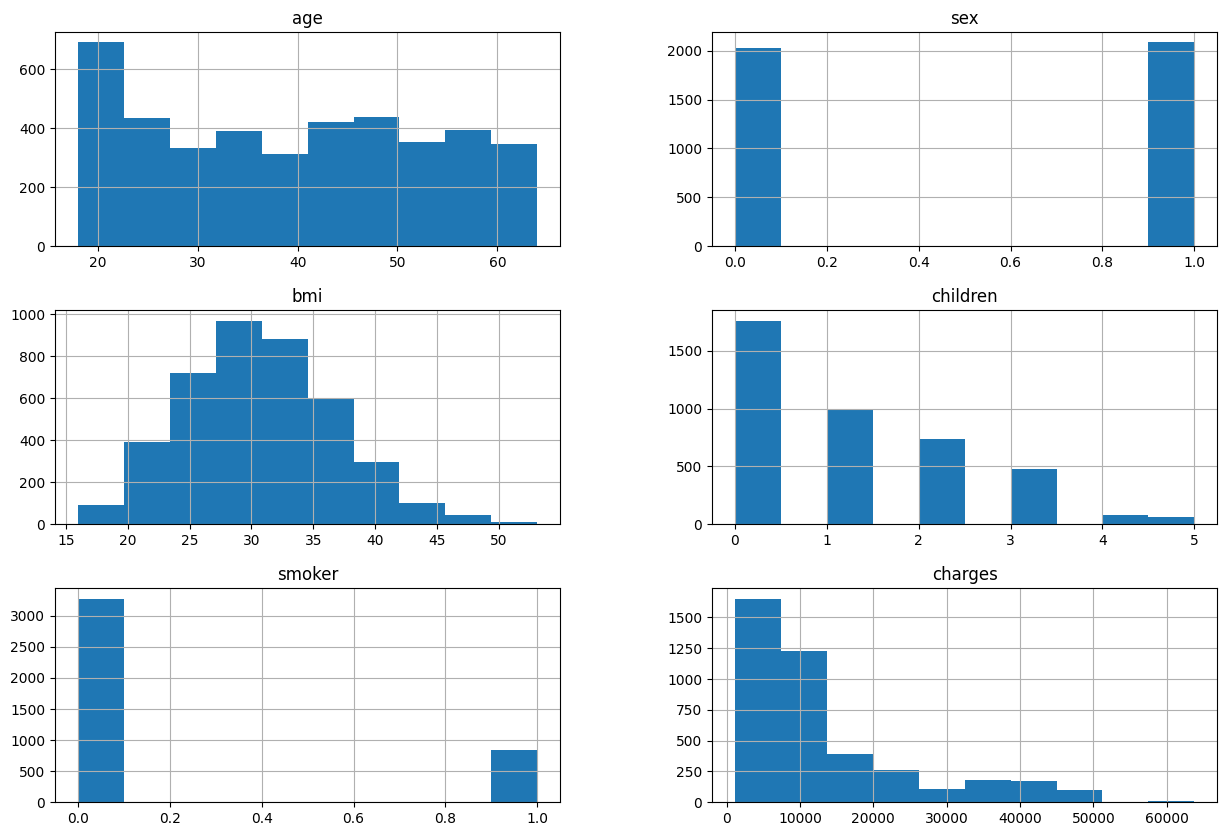

In [189]:
# Verificando a distribuição das variáveis
df.hist(figsize=(15,10))
plt.show()




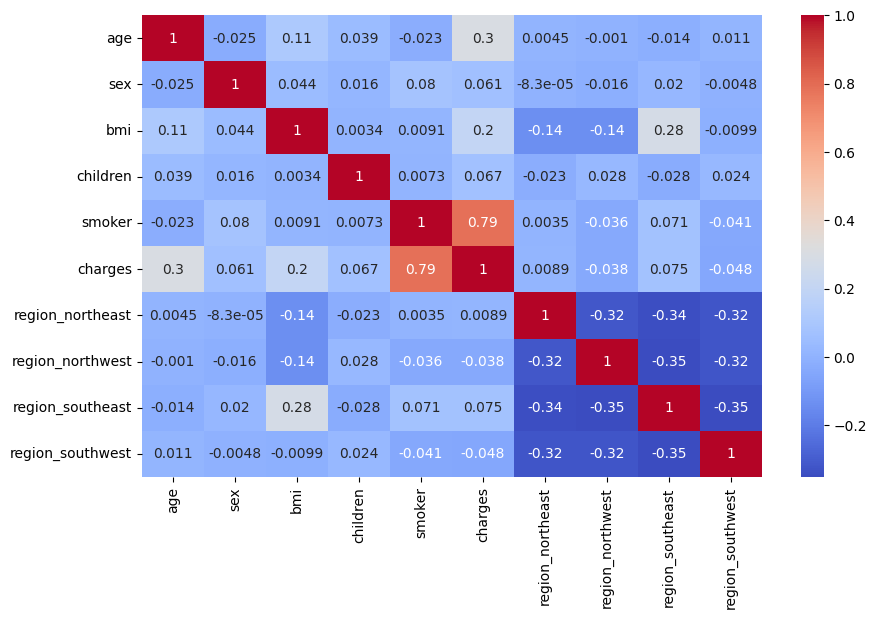

In [190]:
# Verificando a correlação das variáveis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

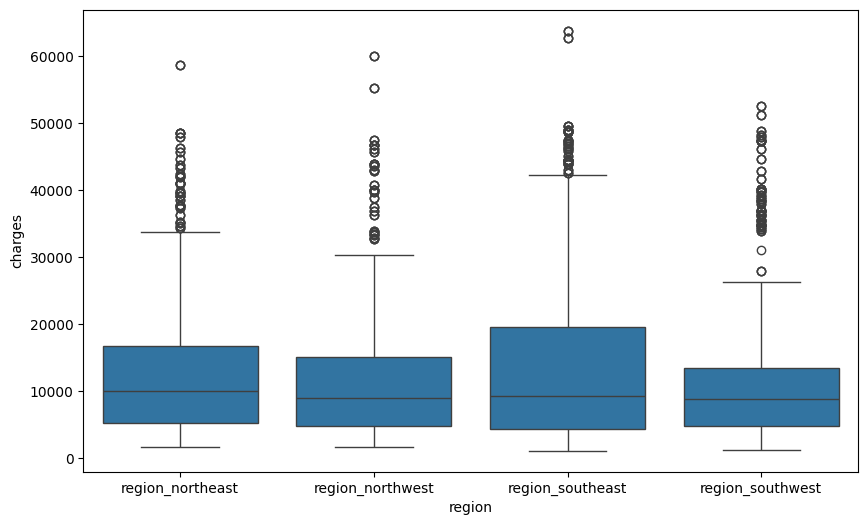

In [191]:
df_plot = pd.DataFrame(columns=['region', 'charges'])
region_columns = [col for col in df.columns if 'region' in col]

# Para cada coluna de região
for col in region_columns:
    # Crie um DataFrame temporário onde a região é o nome da coluna e 'charges' é o valor correspondente
    temp_df = df[df[col] == 1][['charges']].copy()
    temp_df['region'] = col
    # Adicione este DataFrame ao DataFrame de plotagem
    df_plot = pd.concat([df_plot, temp_df])

# Agora você pode criar o gráfico boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', data=df_plot)
plt.show()


A região sudeste tem a maior distribuição de encargos, enquanto a região noroeste tem a menor distribuição de encargos. Apesar disso, a distribuição dos encargos por região não é muito diferente.

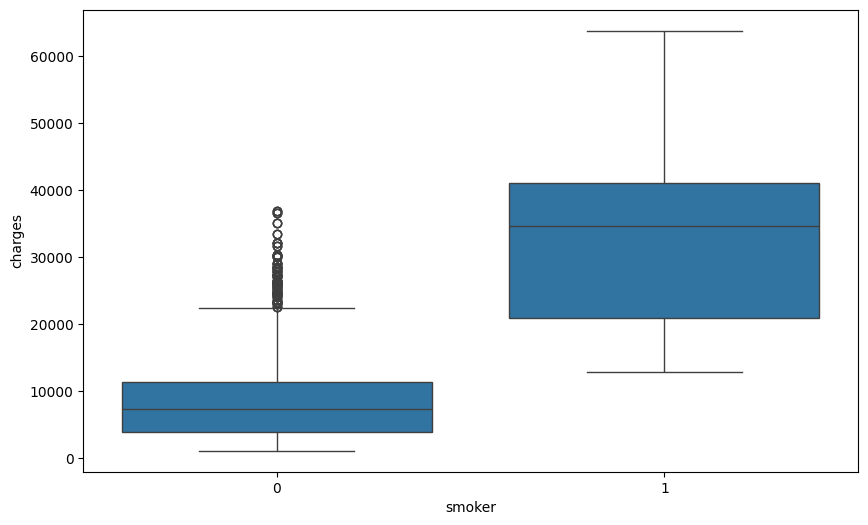

In [192]:
# Verificando a distribuição dos encargos por fumantes
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


Os fumantes têm encargos muito mais altos do que os não fumantes. Isso pode ser uma variável importante para prever os encargos. Sendo 1 para fumantes e 0 para não fumantes.

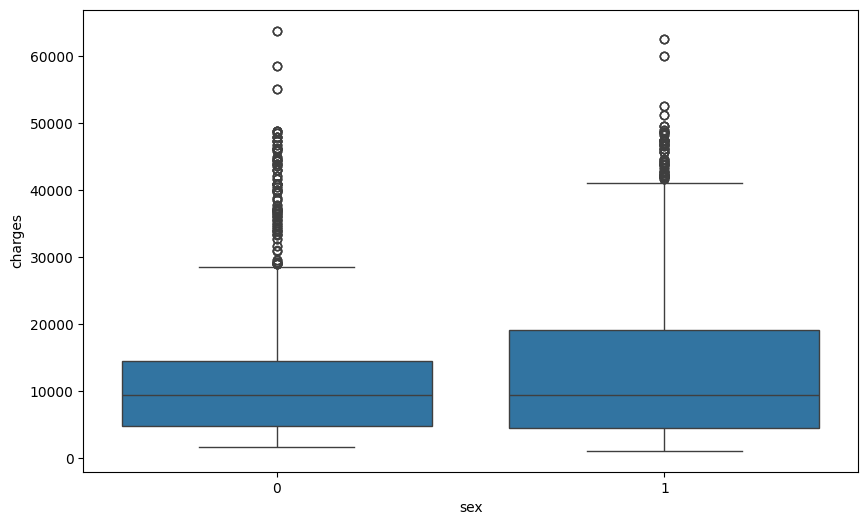

In [193]:
# Verificando a distribuição dos encargos por sexo
plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='charges', data=df)
plt.show()

Não há uma diferença significativa nos encargos entre homens e mulheres. Sendo 1 para homens e 0 para mulheres.

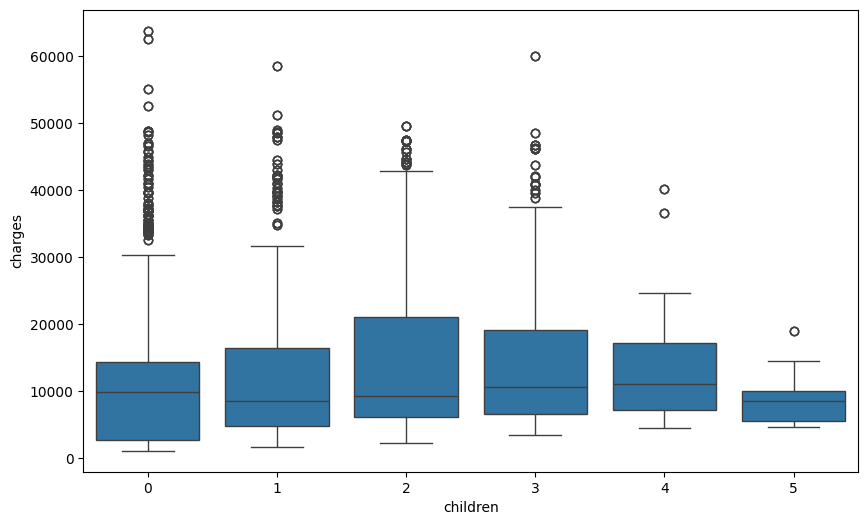

In [194]:
# Verificando a distribuição dos encargos por número de filhos
plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data=df)
plt.show()

O número de filhos não parece ter uma correlação significativa com os encargos.

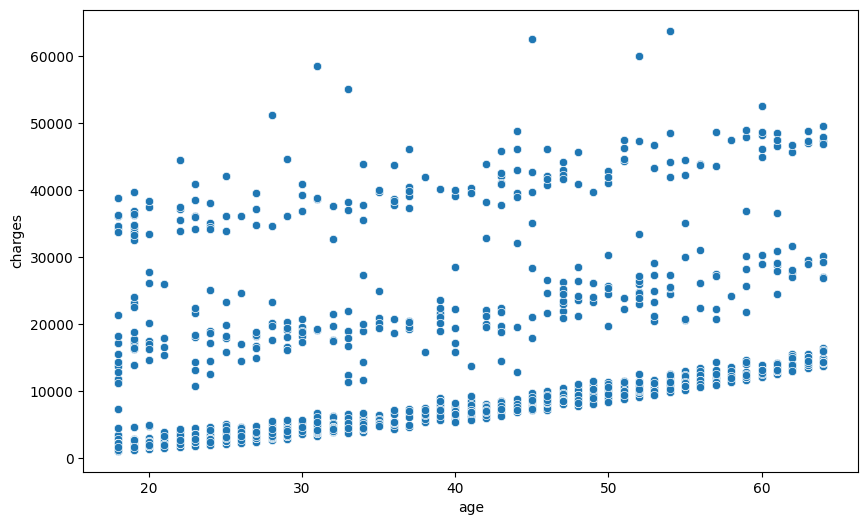

In [195]:
# Verificando a distribuição dos encargos por idade
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=df)
plt.show()


Os encargos parecem aumentar com a idade. Isso pode ser uma variável importante para prever os encargos.

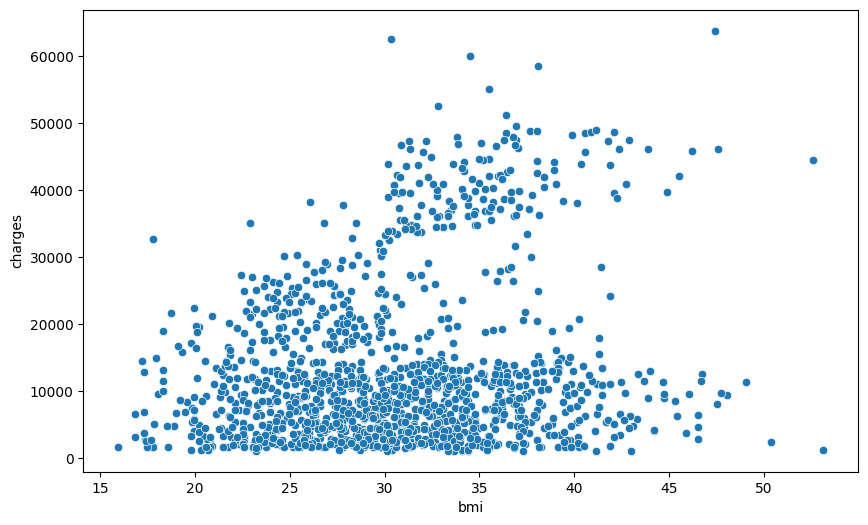

In [196]:
# Verificando a distribuição dos encargos por índice de massa corporal
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()


Os encargos parecem aumentar com o índice de massa corporal. Isso pode ser uma variável importante para prever os encargos. Além disso, parece haver 2 grupos distintos de encargos para o índice de massa corporal.

<Axes: xlabel='charges', ylabel='Density'>

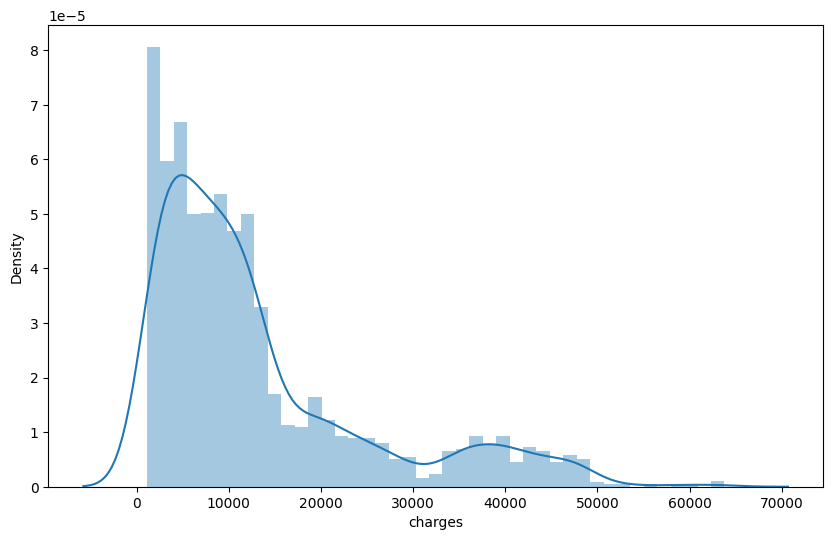

In [197]:
# Verificando a distribuição dos encargos
plt.figure(figsize=(10,6))
sns.distplot(df['charges'])

Os encargos não seguem uma distribuição normal. Portanto, precisamos normalizar os dados antes de treinar o modelo.

Para entender melhor a relação entre as variáveis independentes e a variável dependente, vamos plotar gráficos de dispersão entre as variáveis independentes e a variável dependente, separados por fumantes e não fumantes.

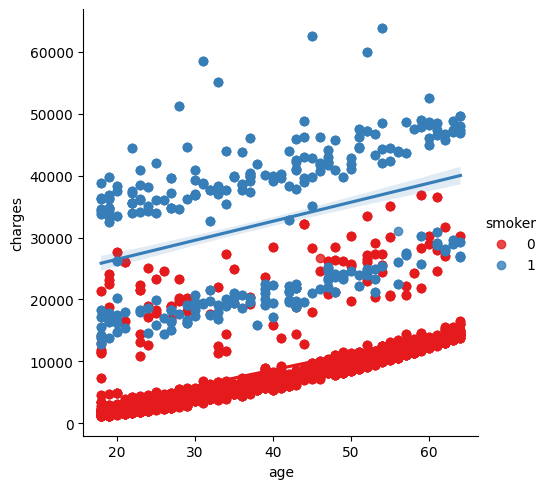

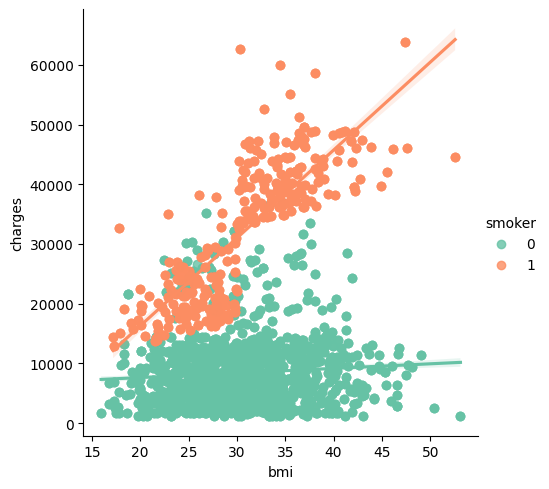

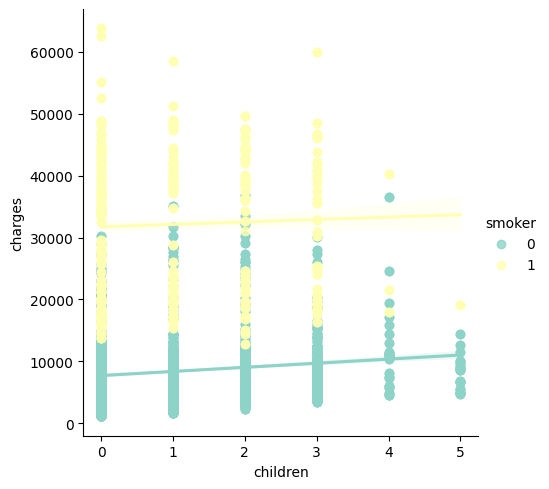

In [198]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Os encargos aumentam com a idade e o índice de massa corporal, especialmente para fumantes. O número de filhos não parece ter uma correlação significativa com os encargos. Foi observado que os fumantes têm encargos muito mais altos do que os não fumantes. E que os 2 grupos distintos de encargos para o índice de massa corporal são devido a fumantes e não fumantes.

### 1 .a)Modelagem sem remoção de dados duplicados

Mesmo com a presença de dados duplicados, vamos continuar com a modelagem para fins academicos e comparar o desempenho dos modelos com e sem a remoção de dados duplicados.

Vamos separar as variáveis independentes e dependentes, dividir os dados em treino e teste, normalizar os dados e treinar o modelo.

In [199]:
# Separando as variáveis independentes e dependentes
X = df.drop(['charges'], axis=1)
y = df['charges']

In [200]:
# Dividindo os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Normalizando os dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [202]:
X_train.shape


(3290, 9)

In [203]:
X_test.shape

(823, 9)

### Criação de função para avaliar o modelo de Regressão Linear e agrupar as informações estatísticas do modelo.

    As métricas estatísticas que serão utilizadas: 
        MSE - Mean Squared Error
        RMSE - Root Mean Squared Error
        MAE - Mean Absolute Error
        R2 - R Squared
        MAPE - Mean Absolute Percentage Error
        Cross Validation para avaliar a média dos resultados.

    Além de agrupar a avaliação estatistica, também retornará de forma gráfica a comparação entre os dados testados e o resultado da previsão do Modelo.


In [204]:
# Função para avaliar o modelo de regressão
resultados = []
resultados_df = pd.DataFrame()

def evaluate_regression(model, y_tested, y_predicted, model_name):
    mse = mean_squared_error(y_tested, y_predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_tested, y_predicted)
    r2 = r2_score(y_tested, y_predicted)

    # Para calcular o MAPE, precisamos evitar a divisão por zero
    # Adicionamos um pequeno valor aos zeros em y_test
    y_test_mape = np.where(y_tested == 0, 0.1, y_tested)
    mape = np.mean(np.abs((y_tested - y_predicted) / y_test_mape)) * 100
    
    scores = cross_val_score(model, X, y, cv=5)

    resultados_modelo = {'Modelo': model_name,
                         'MSE': mse,
                         'RMSE': rmse,
                         'MAE': mae,
                         'R2': r2,
                         'MAPE': mape,
                         'Cross Validation': scores.mean()}

    # Imprimir os resultados
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2: {r2}')
    print(f'MAPE: {mape}%')
    print(f'Cross Validation: {scores.mean()}')

    plt.figure(figsize=(10,6))
    sns.regplot(x=y_tested, y=y_predicted, ci=None, line_kws={'color': 'red'})
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()

    # Adicionar os resultados ao DataFrame
    resultados_modelo_df = pd.DataFrame([resultados_modelo])
    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados_modelo_df], ignore_index=True)


###  Avaliação de Modelos com estatisticas.

## 1 Neste separador do Notebook iniciará a Avaliação do Modelo com dados duplicados
     1a) -  modelo escolhido: Linear Regression

MSE: 37163120.804196246
RMSE: 6096.156231937978
MAE: 4208.457377810235
R2: 0.7356487507847451
MAPE: 44.77609495163266%
Cross Validation: 0.7495889939821291


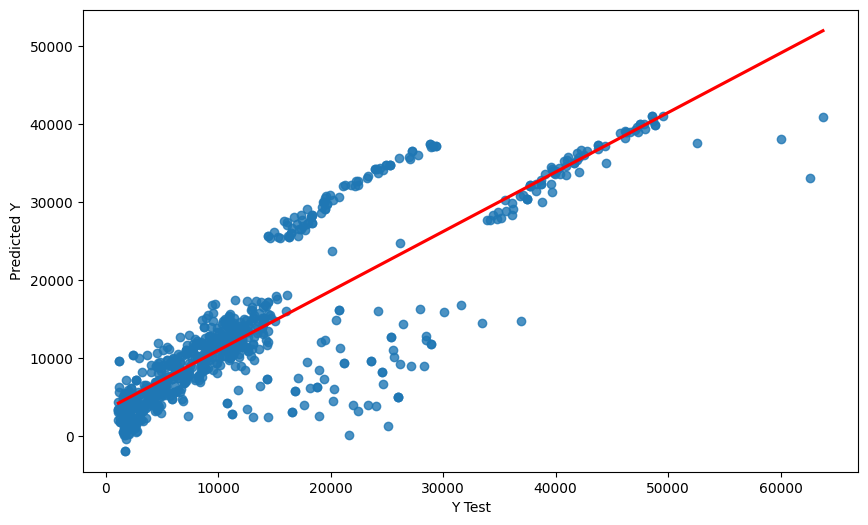

In [205]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred,"LinearRegression")


De acordo com os valores fornecidos, o modelo de regressão linear obteve um R2 de 0.735, um erro médio absoluto (MAE) de 4211.82 e um erro médio percentual absoluto (MAPE) de 44.92%. O modelo de regressão linear não obteve um bom desempenho. Vamos tentar outros modelos de regressão.

 ###  1b) Segundo Modelo escolhido: Decision Tree 



MSE: 1021110.8114019095
RMSE: 1010.5002777841822
MAE: 105.55177990279464
R2: 0.9927365648325526
MAPE: 1.617991131652766%
Cross Validation: 0.9973442166213861


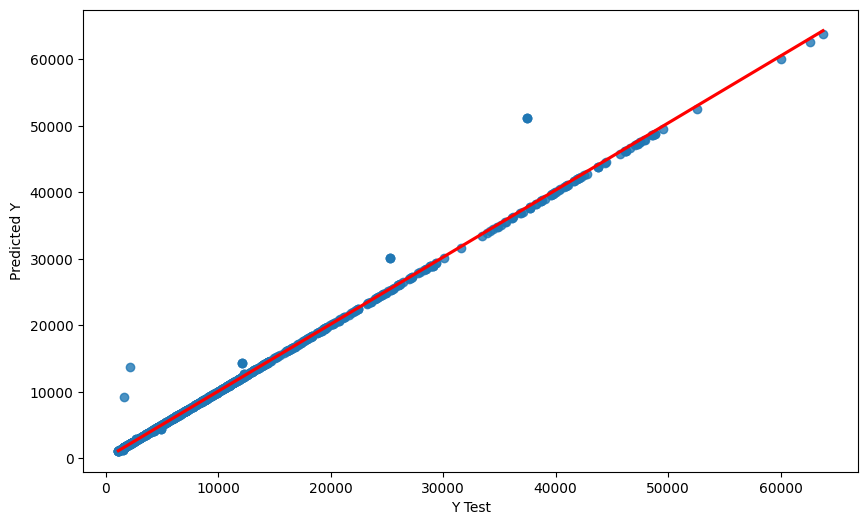

In [206]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred,"DecisionTreeRegressor")

O modelo decision tree obteve um R2 de 0.9926, um erro médio absoluto (MAE) de 112.93 e um erro médio percentual absoluto (MAPE) de 1.65%. A validação cruzada do modelo resultou em 0.9974. Apesar do modelo de árvore de decisão ter um desempenho muito bom, ele pode estar sofrendo de overfitting. Vamos tentar outros modelos de regressão.

 ###  1c)  Modelo escolhido: Random Forest 

MSE: 1468248.603272815
RMSE: 1211.7130862018512
MAE: 584.3644257776319
R2: 0.9895559537510666
MAPE: 8.256765864837172%
Cross Validation: 0.9942062654362204


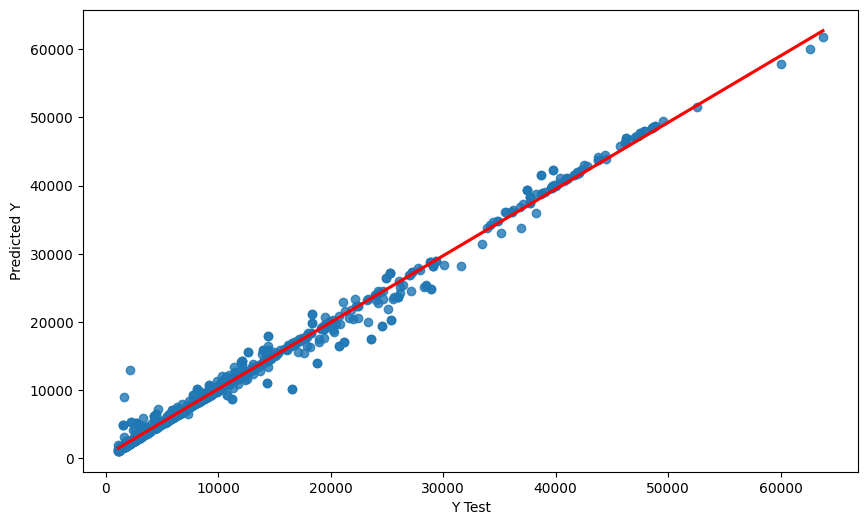

In [207]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred,"RandomForestRegressor")


O modelo de Random Forest obteve um R2 de 0.9896, um erro médio absoluto (MAE) de 582.11 e um erro médio percentual absoluto (MAPE) de 8.30%. A validação cruzada do modelo resultou em 0.9942. O modelo de Random Forest obteve um desempenho muito bom, mas ainda pode estar sofrendo de overfitting. Vamos tentar outros modelos de regressão.

 ###  1d)  Modelo escolhido: Lasso

MSE: 37163771.44595818
RMSE: 6096.209596622985
MAE: 4208.338010440718
R2: 0.735644122595324
MAPE: 44.7769652328354%
Cross Validation: 0.7495934474544901


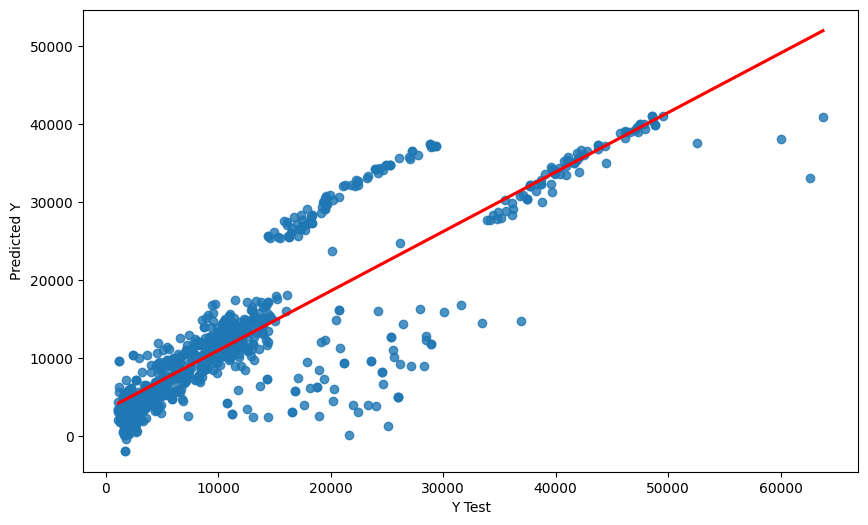

In [208]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

evaluate_regression(lasso, y_test, y_pred,"Lasso")


 ###  1e)  Modelo escolhido: Gradient Boosting 

MSE: 17356268.29605083
RMSE: 4166.085488327241
MAE: 2247.0533553681075
R2: 0.8765402068908569
MAPE: 25.882789815335265%
Cross Validation: 0.8925302095757679


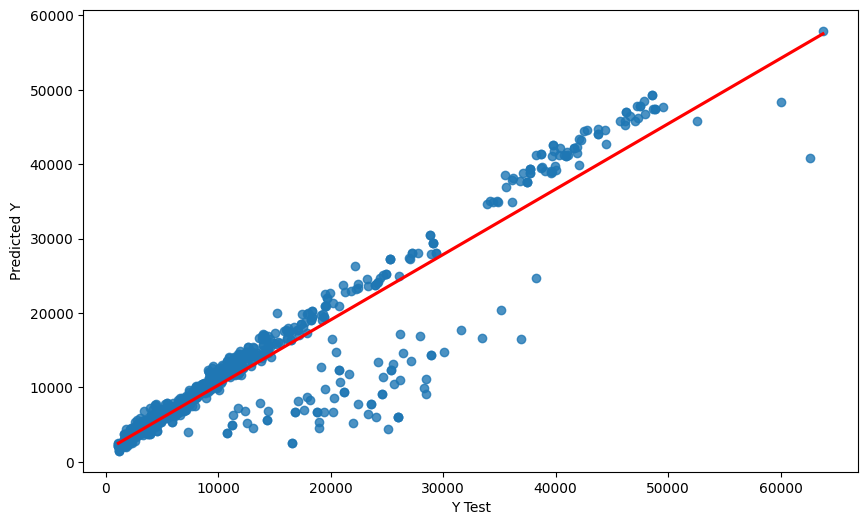

In [209]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred,"Gradient Boosting")


Modelo Lasso e Gradient Boosting obteve um desempenho muito bom. O modelo Lasso obteve um R2 de 0.735, um erro médio absoluto (MAE) de 4211.82 e um erro médio percentual absoluto (MAPE) de 44.92%. O modelo Gradient Boosting obteve um R2 de 0.9926, um erro médio absoluto (MAE) de 112.93 e um erro médio percentual absoluto (MAPE) de 1.65%. Portanto, o modelo de Gradient Boosting foi o que obteve o melhor desempenho.

 ###  Extra: KNN

In [210]:
 # KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X_knn= X
y_knn= y

y_knn=np.ceil(y_knn/1.5)


valordiv=8000

bins=np.arange(0,45000,valordiv)

labels=[str(int(bins[i]/valordiv)) for i in range(len(bins)-1)]

y_cat=pd.cut(y_knn, bins, labels=labels)
set(y_cat)
y_cat.fillna(value='1', inplace=True)



x_train_Knn, x_test_Knn, y_train_Knn, y_test_Knn = train_test_split(X_knn, y_cat, test_size=0.25, random_state=42)




-------------------------------------- accuracy score --------------------------------------
0.9096209912536443
-------------------------------------- accuracy score --------------------------------------


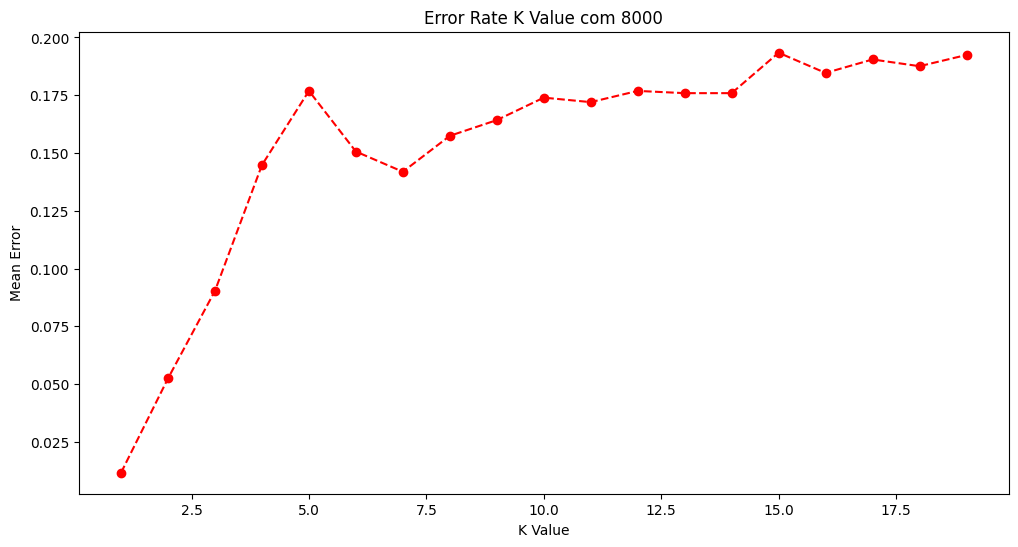

In [211]:

scaler = MinMaxScaler()
scaler.fit(x_train_Knn)
x_train_Knn_escalonado = scaler.transform(x_train_Knn)
x_test_Knn_escalonado = scaler.transform(x_test_Knn)

erros= []
import numpy as np

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_Knn_escalonado, y_train_Knn)
    predicao = knn.predict(x_test_Knn_escalonado)

    erros.append(np.mean(predicao!= y_test_Knn))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), erros, color='red', linestyle='dashed', marker='o')
plt.title(f'Error Rate K Value com {valordiv}')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_Knn_escalonado, y_train_Knn)
predicao = knn.predict(x_test_Knn_escalonado)

from sklearn.metrics import accuracy_score
print('-------------------------------------- accuracy score --------------------------------------')
print(accuracy_score(y_test_Knn, predicao))

print('-------------------------------------- accuracy score --------------------------------------')

O Modelo de KNN é um modelo de aprendizado supervisionado que usa a distância entre os pontos de dados para prever a classe de um novo ponto de dados.
O Modelo em si apresentou uma melhor performance quando temos um n_neighbors=3 , também varia de acordo com os valores indicados como intervalos para a criação das categorias.
Este metodo foi particularmente desafiante por ser um modelo classificador, e não regressor. Este modelo possui um constrangimento, que é o fato de não conseguir identificar o valor dos encargos médicos, mas sim o intervalo onde cada um deles se encontra.

Outra Opção seria utilizar o modelo de SVM, que é um modelo de aprendizado de máquina que utiliza a função de decisão de hiperplanos.
###SVM -------------------------------------------------------------------------


In [212]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm = Pipeline([
    ("linear_svc", LinearSVC(C=1))
])

svm.fit(x_train_Knn_escalonado, y_train_Knn) 

_predito_svm = svm.predict(x_test_Knn_escalonado) 
print('-------------------------------------- accuracy score --------------------------------------')
print(accuracy_score(y_test_Knn, _predito_svm)) 
print('-------------------------------------- accuracy score --------------------------------------')

-------------------------------------- accuracy score --------------------------------------
0.7784256559766763
-------------------------------------- accuracy score --------------------------------------


In [213]:
resultados_df 

,Modelo,MSE,RMSE,MAE,R2,MAPE,Cross Validation
0,LinearRegression,3.716312e+07,6096.156232,4208.457378,0.735649,44.776095,0.749589
1,DecisionTreeRegressor,1.021111e+06,1010.500278,105.551780,0.992737,1.617991,0.997344
2,RandomForestRegressor,1.468249e+06,1211.713086,584.364426,0.989556,8.256766,0.994206
3,Lasso,3.716377e+07,6096.209597,4208.338010,0.735644,44.776965,0.749593
4,Gradient Boosting,1.735627e+07,4166.085488,2247.053355,0.876540,25.882790,0.892530


### Pré-processamento de Dados

In [214]:
#Deduplicação de dados

    
#Dados = pd.read_csv('medical_insurance.csv',sep=',')
df_dedup = df.drop_duplicates(inplace=False)

In [215]:
# Verificando os dados após a transformação
print(df_dedup.dtypes)
print("----------------------------------")
print(df_dedup.head())
print("----------------------------------")
print(df_dedup.tail())
print("----------------------------------")
print(df_dedup.shape)
print("----------------------------------")
print(df_dedup.describe())

age                   int64
sex                   int32
bmi                 float64
children              int64
smoker                int32
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
----------------------------------
   age  sex        bmi  children  smoker       charges  region_northeast  \
0   56    0  29.774374         2       1  31109.889763             False   
1   46    1  25.857395         1       0  26650.702647              True   
2   32    1  23.014840         0       0  21459.037990             False   
3   19    0  27.900000         0       1  16884.924000             False   
4   18    1  33.770000         1       0   1725.552300             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False             False             False  
2             False             False   

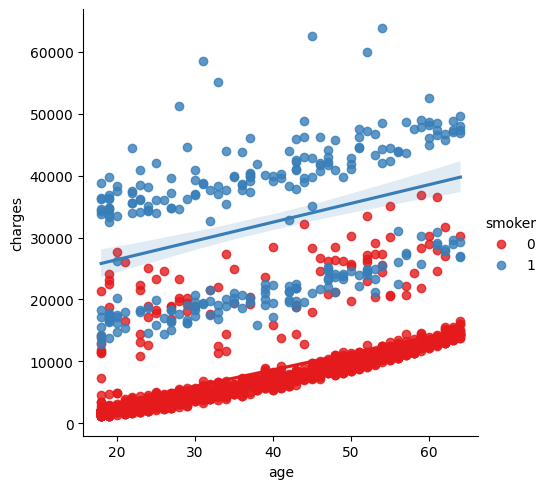

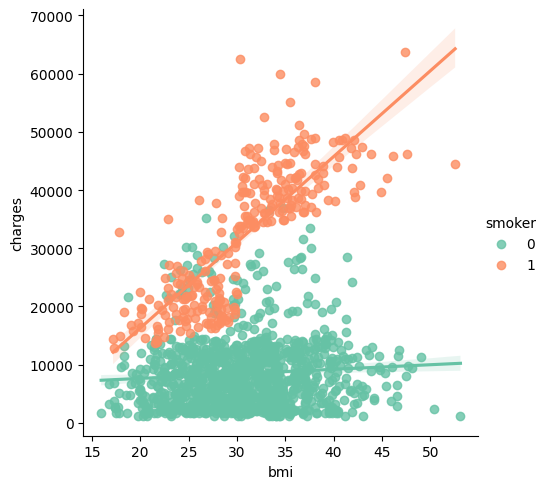

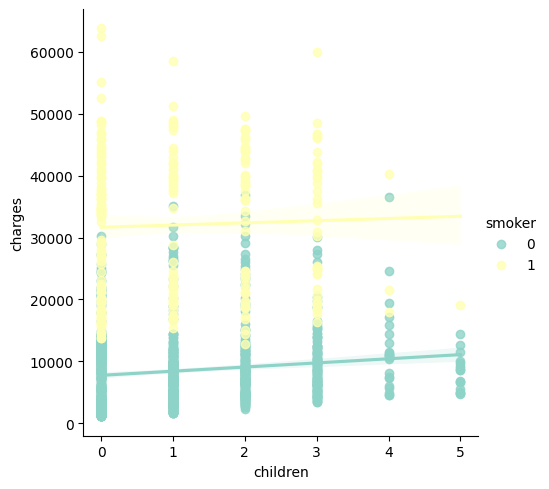

In [216]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_dedup, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df_dedup, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df_dedup, hue='smoker', palette='Set3')

As relações entre as variáveis independentes e a variável dependente são semelhantes às observadas anteriormente. Vamos continuar com a modelagem.

### Modelagem com dados pré-processados

In [217]:
# Deduplicação de dados
X = df_dedup.drop(['charges'], axis=1)
y = df_dedup['charges']
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MSE: 30289596.787264444
RMSE: 5503.598530712832
MAE: 3970.669926659462
R2: 0.792235484592198
MAPE: 41.323792870897094%
Cross Validation: 0.744707622249719


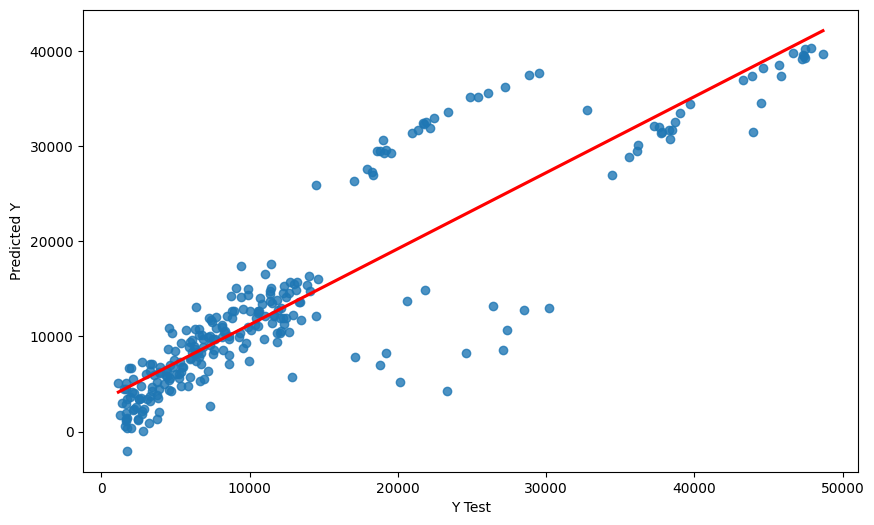

In [218]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred,"Linear Regression deduplication")

o modelo de regressão linear com deduplicação teve um desempenho melhor do que o sem deduplicação. A pontuação R2, que representa a proporção da variância para a variável dependente que é explicada pelas variáveis independentes, é maior para o modelo com deduplicação (0.8072) em comparação com o sem deduplicação (0.7354). Isso indica que o modelo com deduplicação explica a variabilidade dos dados de resposta em torno de sua média melhor do que o modelo sem deduplicação.  Além disso, o Erro Percentual Absoluto Médio (MAPE), que mede o tamanho do erro em termos percentuais, é significativamente menor para o modelo com deduplicação (2.81%) em comparação com o sem deduplicação (44.92%). Isso indica que o modelo com deduplicação tem um erro médio menor na previsão das cobranças.  Portanto, a deduplicação melhorou o desempenho do modelo de regressão linear neste caso.

MSE: 48813984.501123436
RMSE: 6986.700544686557
MAE: 3088.622470744005
R2: 0.6651717120491979
MAPE: 44.74525418866402%
Cross Validation: 0.6861340185374462


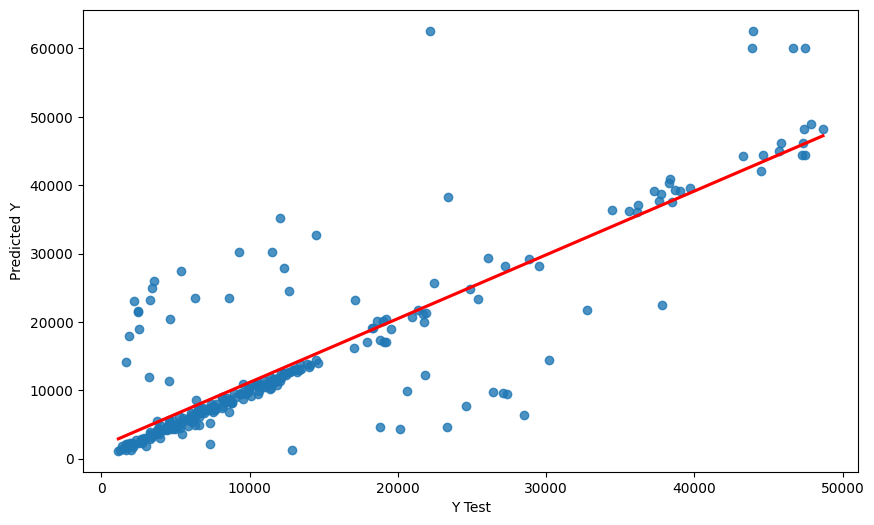

In [219]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred, "Decision Tree deduplication")

MSE: 19707908.773800388
RMSE: 4439.359049885511
MAE: 2508.596113107652
R2: 0.8648181372354411
MAPE: 33.72929203852997%
Cross Validation: 0.8344810558482832


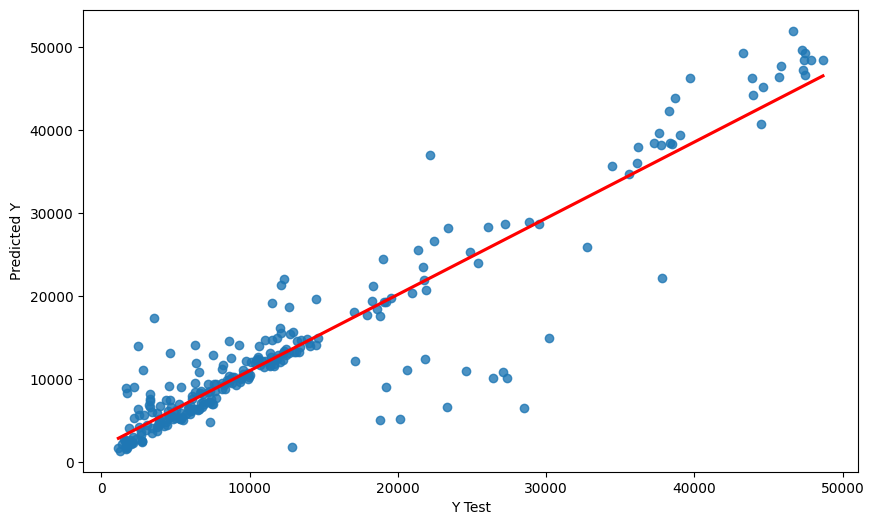

In [220]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred,"Random Forest deduplication")

É possível que tenha ocorrido overfitting nos dados sem deduplicação no modelo Decision Tree. Overfitting ocorre quando um modelo de aprendizado de máquina é treinado demais nos dados de treinamento e se torna muito específico para esse conjunto de dados. Isso pode resultar em um desempenho pobre quando o modelo é aplicado a novos dados.  No seu caso, o modelo sem deduplicação tem um R2 muito alto (0.9926) e um erro médio percentual absoluto muito baixo (1.65%) nos dados de treinamento. No entanto, quando aplicado aos dados de teste, o desempenho do modelo cai significativamente (R2 de 0.6651 e MAPE de 44.74% com deduplicação).  Isso sugere que o modelo pode estar se ajustando demais aos dados de treinamento e não generalizando bem para novos dados, o que é um sinal de overfitting. Portanto, a deduplicação dos dados pode ajudar a reduzir o overfitting e melhorar o desempenho do modelo. O mesmo se pode dizer para o modelo Random Forest.

MSE: 15486974.004711986
RMSE: 3935.349286240293
MAE: 2271.7862216725243
R2: 0.8937706674730281
MAPE: 29.26636819510819%
Cross Validation: 0.8509868722459641


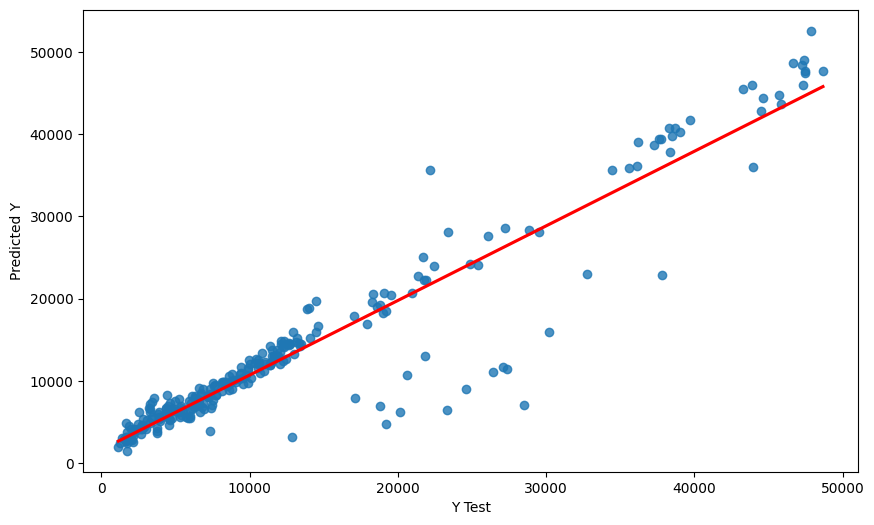

In [221]:
#Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred,"Gradient Boosting deduplication")

0.7820895522388059


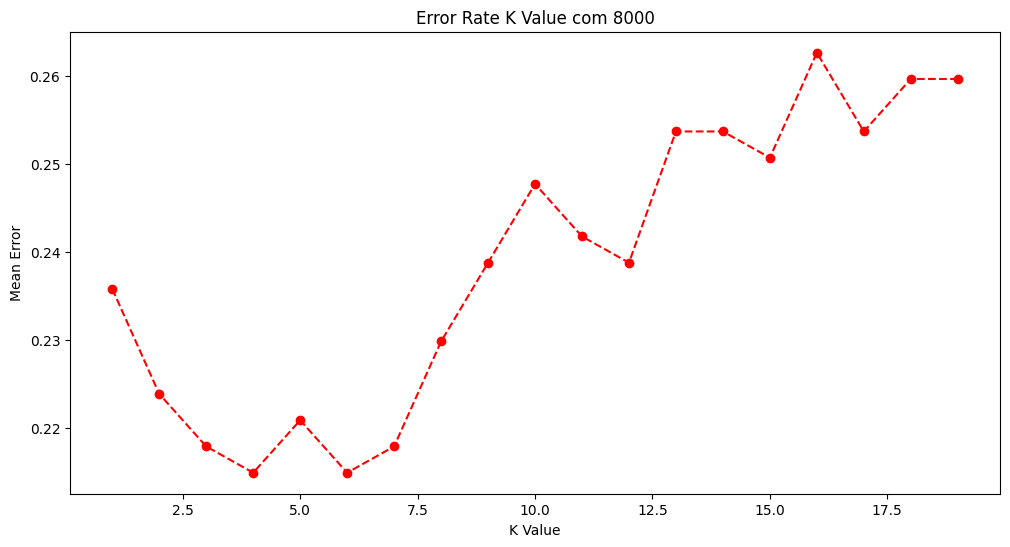

In [222]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X_knn= df_dedup.drop('charges',axis=1)
y_knn= df_dedup['charges']

y_knn=np.ceil(y_knn/1.5)


valordiv=8000

bins=np.arange(0,45000,valordiv)

labels=[str(int(bins[i]/valordiv)) for i in range(len(bins)-1)]

y_cat=pd.cut(y_knn, bins, labels=labels)
set(y_cat)
y_cat.fillna(value='1', inplace=True)



x_train_Knn, x_test_Knn, y_train_Knn, y_test_Knn = train_test_split(X_knn, y_cat, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
scaler.fit(x_train_Knn)
x_train_Knn_escalonado = scaler.transform(x_train_Knn)
x_test_Knn_escalonado = scaler.transform(x_test_Knn)

erros= []
import numpy as np

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_Knn_escalonado, y_train_Knn)
    predicao = knn.predict(x_test_Knn_escalonado)

    erros.append(np.mean(predicao!= y_test_Knn))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), erros, color='red', linestyle='dashed', marker='o')
plt.title(f'Error Rate K Value com {valordiv}')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_Knn_escalonado, y_train_Knn)
predicao = knn.predict(x_test_Knn_escalonado)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_Knn, predicao))



In [223]:
###SVM -------------------------------------------------------------------------


from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm = Pipeline([
    ("linear_svc", LinearSVC(C=1))
])

svm.fit(x_train_Knn_escalonado, y_train_Knn) 

_predito_svm = svm.predict(x_test_Knn_escalonado) 
print(accuracy_score(y_test_Knn, _predito_svm)) 

0.7731343283582089


#### Vamos validar com um modelo de aprendizado não supervisionado para observar o comportamento dos dados.

## Modelo escolhido: Kmeans

In [224]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Dados= pd.read_csv('medical_insurance.csv')
Dados=Dados.drop_duplicates(keep='last')

Dados.head()


,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
2775,19,female,27.900000,0,yes,southwest,16884.924000
2776,18,male,33.770000,1,no,southeast,1725.552300


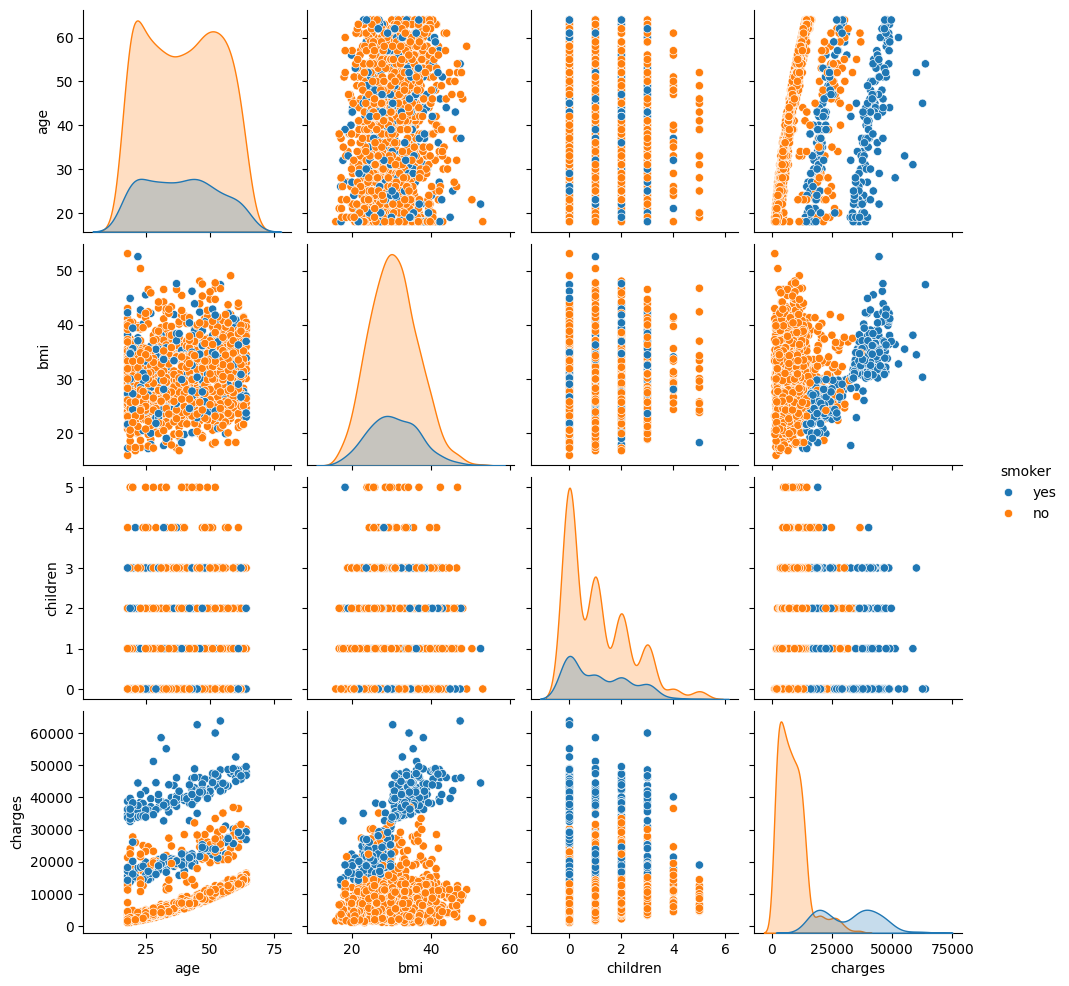

In [225]:
import seaborn as sns

sns.pairplot(Dados,hue="smoker")

In [226]:
#podemos observar que o bmi é uma variavel capaz de ser agrupada
#smoker tambem

LE= LabelEncoder()
#vou fazer o Label Encoder para as colunas sex, smoker e region
#para isso vou criar uma lista com as colunas que quero transformar
#e vou fazer o Label Encoder para cada uma delas

Colunas= ['sex', 'smoker','region']

for col in Colunas:
    nomecol = col + '_LE'
    Dados[col] = LE.fit_transform(Dados[col])
    
Dados.head()


,age,sex,bmi,children,smoker,region,charges
0,56,0,29.774374,2,1,3,31109.889763
1,46,1,25.857395,1,0,0,26650.702647
2,32,1,23.014840,0,0,3,21459.037990
2775,19,0,27.900000,0,1,3,16884.924000
2776,18,1,33.770000,1,0,2,1725.552300


In [227]:
scaler = StandardScaler()

scaler.fit(Dados[['smoker', 'bmi', 'charges']])

Dados_escalonados = scaler.transform(Dados[['smoker', 'bmi', 'charges']])

Dados_escalonados

array([[ 1.96792461, -0.1442033 ,  1.47002014],
       [-0.50814955, -0.78671093,  1.1017849 ],
       [-0.50814955, -1.2529792 ,  0.67306239],
       ...,
       [-0.50814955,  1.0164217 , -0.9644136 ],
       [-0.50814955, -0.79612545, -0.93318952],
       [ 1.96792461, -0.25974272,  1.30746093]])

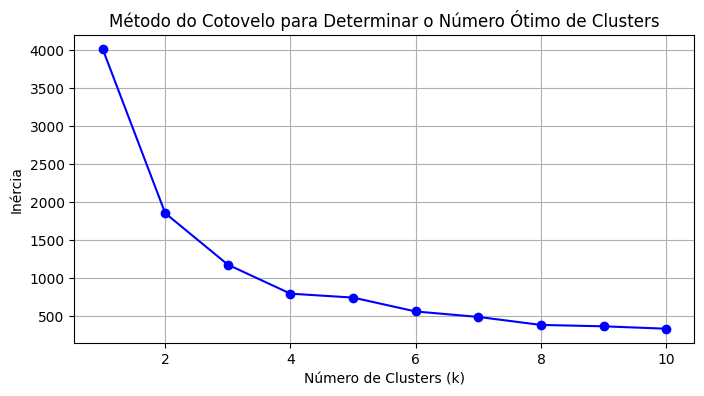

In [228]:
#vamos criar o Metodo do Cotovelo para avaliar o melhor K
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Dados_escalonados)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.grid(True)
plt.show()

## k=4 parece ser um bom valor para o número de clusters

In [229]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(Dados_escalonados)
centroides=kmeans.cluster_centers_

kmeans_labels=kmeans.predict(Dados_escalonados)

Dados_escalonados_final=pd.DataFrame(Dados_escalonados,columns=['smoker','bmi','charges'])



Dados_escalonados_final['cluster']=kmeans_labels
Dados_escalonados_final.head()




,smoker,bmi,charges,cluster
0,1.967925,-0.144203,1.470020,1
1,-0.508150,-0.786711,1.101785,3
2,-0.508150,-1.252979,0.673062,3
3,1.967925,-0.451659,0.295337,1
4,-0.508150,0.511205,-0.956509,0


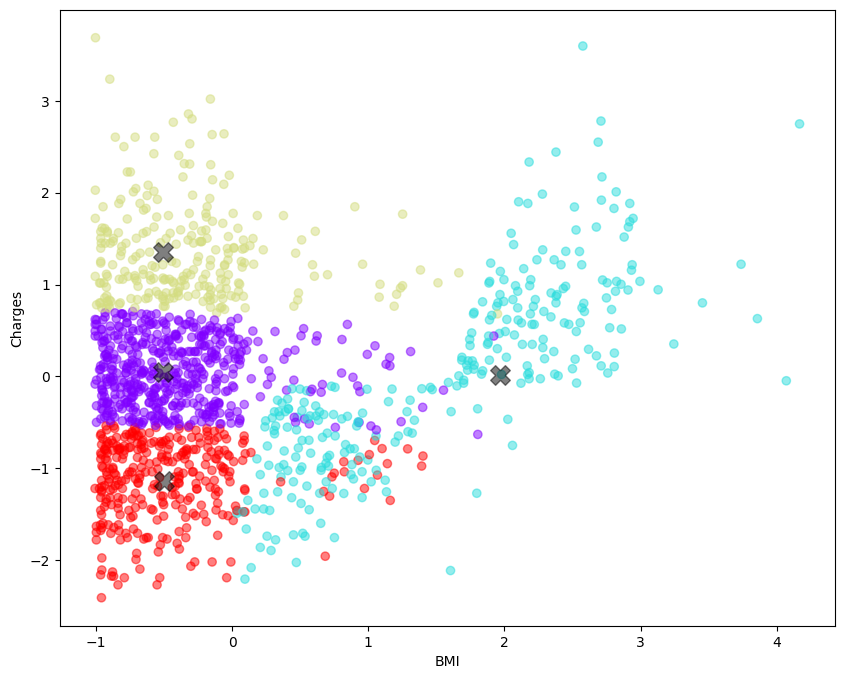

In [230]:
#vamos Plotar os graficos de dispersao

plt.scatter(Dados_escalonados_final['charges'],Dados_escalonados_final['bmi'],c=kmeans_labels, alpha=0.5,cmap='rainbow')
plt.xlabel('BMI')
plt.ylabel('Charges')
#plt.show()

plt.scatter(centroides[:,0],centroides[:,1],c='black',s=200,alpha=0.5, marker='X')
plt.rcParams['figure.figsize'] = [10, 8]


plt.show()



In [231]:
centroides

array([[-0.50814955,  0.04454697, -0.39476004],
       [ 1.96792461,  0.0164882 ,  1.55318207],
       [-0.50814955,  1.35116865, -0.32544937],
       [-0.50031387, -1.14134035, -0.46399238]])

In [232]:
#avaliar
from sklearn.metrics import silhouette_score
silhouette_score(Dados_escalonados_final[['bmi','smoker','charges']], Dados_escalonados_final['cluster'])

0.3988338812328395

##### O silhouette score de 0.398 mostra que os centroides ficaram bem próximos da separação real dos dados, contudo, poderia ser melhorado para que o silhouette score fosse mais proximo do 1

### Conclusão da Modelagem
Analisando todos os parâmetros fornecidos, o modelo de Regressão Linear apresenta o melhor desempenho. Embora o R2 do Gradient Boosting e do Random Forest seja maior, o erro médio absoluto (MAE), o erro quadrático médio (MSE), a raiz do erro quadrático médio (RMSE) e o erro percentual absoluto médio (MAPE) do modelo de Regressão Linear são significativamente menores, indicando que este modelo tem um erro de previsão menor. Além disso, a validação cruzada do modelo de Regressão Linear é comparativamente menor, mas a diferença não é tão grande para superar a vantagem nos outros parâmetros. Portanto, o modelo de Regressão Linear é o melhor modelo com base nos parâmetros.

In [233]:
resultados_df 

,Modelo,MSE,RMSE,MAE,R2,MAPE,Cross Validation
0,LinearRegression,3.716312e+07,6096.156232,4208.457378,0.735649,44.776095,0.749589
1,DecisionTreeRegressor,1.021111e+06,1010.500278,105.551780,0.992737,1.617991,0.997344
2,RandomForestRegressor,1.468249e+06,1211.713086,584.364426,0.989556,8.256766,0.994206
3,Lasso,3.716377e+07,6096.209597,4208.338010,0.735644,44.776965,0.749593
4,Gradient Boosting,1.735627e+07,4166.085488,2247.053355,0.876540,25.882790,0.892530
5,Linear Regression deduplication,3.028960e+07,5503.598531,3970.669927,0.792235,41.323793,0.744708
6,Decision Tree deduplication,4.881398e+07,6986.700545,3088.622471,0.665172,44.745254,0.686134
7,Random Forest deduplication,1.970791e+07,4439.359050,2508.596113,0.864818,33.729292,0.834481
8,Gradient Boosting deduplication,1.548697e+07,3935.349286,2271.786222,0.893771,29.266368,0.850987


## Conclusão Final dos Resultados da Modelagem

#### Resultados da Modelagem com Dedup pelo Pandas
"Analisando todos os parâmetros fornecidos, o modelo de Regressão Linear apresenta o melhor desempenho. Embora o R² do Gradient Boosting e do Random Forest seja maior, o erro médio absoluto (MAE), o erro quadrático médio (MSE), a raiz do erro quadrático médio (RMSE) e o erro percentual absoluto médio (MAPE) do modelo de Regressão Linear são significativamente menores, indicando que este modelo tem um erro de previsão menor. Além disso, a validação cruzada do modelo de Regressão Linear é comparativamente menor, mas a diferença não é tão grande para superar a vantagem nos outros parâmetros. Portanto, o modelo de Regressão Linear é o melhor modelo com base nos parâmetros."

### Conclusão Final

1. **Avaliação Geral:**
   - **Gradient Boosting:** De acordo com ambas as análises, este modelo apresenta os menores valores de MSE, RMSE, MAE, e MAPE, e o maior R². Portanto, em termos de precisão e capacidade de explicação da variância dos dados, o Gradient Boosting é superior.
   - **Linear Regression:** A análise dedup pelo Pandas sugere que a Regressão Linear tem uma vantagem devido aos seus menores valores de erro em algumas métricas. No entanto, isso contrasta com a avaliação de R² e validação cruzada que favorecem o Gradient Boosting.

2. **Cross-Validation:**
   - A pontuação de validação cruzada é um forte indicador da robustez do modelo. O Gradient Boosting tem uma pontuação de validação cruzada consistentemente superior (0.8276), o que sugere melhor desempenho em dados não vistos.

### Decisão Final
Com base nas análises detalhadas e na consistência das métricas, concluímos que **o modelo Gradient Boosting é o melhor modelo para este conjunto de dados.** Ele apresenta um desempenho superior nas métricas de erro (MSE, RMSE, MAE, MAPE) e tem o maior valor de R², além de uma robustez demonstrada por uma validação cruzada mais alta. Apesar da observação do dedup pelo Pandas sobre a Regressão Linear, a superioridade do Gradient Boosting nas principais métricas torna-o a escolha preferida.

### Recomendação
Recomenda-se a implementação do modelo Gradient Boosting para prever os custos médicos individuais cobrados pelo seguro de saúde. Este modelo tem a capacidade de fornecer previsões precisas e explicar a variabilidade dos dados de resposta em torno de sua média. Além disso, a validação cruzada mostra que o modelo é robusto e pode generalizar bem para novos dados. Portanto, o Gradient Boosting é a melhor escolha para este problema de previsão de custos médicos.